This is a sample script that illustrates some potentially useful ways to use python in a Jupyter notebook to work on this lab, and perhaps others. If you want more information on any of these techniques, or are curious how this could be made more detailed, google is your friend. Or bing. There is a wealth of information out there, and python (and notebooks) are becoming very popular.

A good practice is to start with %matplotlib inline so graphics appear as you create them. Other packages that are needed should generally be imported at the top too. Remember {shift}-{enter} executes the cell and creates a new one below (or you can use the menus and icons above).

Note that by default a new cell is for "Code", as indicated above. Changing that to "Markdown" allows you to enter text, images, and equations to document your work flow. Other options are available too, but these are the two used in this example. You can double-click on any cell to see the markdown text that was entered before execulting the cell (Markdown cells also need to be executed).

In [2]:
%matplotlib inline
from math import log, log10
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root

In open-channel hydraulics, a typical channel is trapezoidal in cross-section, as shown below. 

![Trapezoidal channel](trapezoid.png)

For a given flow, Q, the depth, y can take different values. One important depth is one called critical depth. For a simple example where b=3 m and z=2, the relationship is given by: $$\frac {Q}{\sqrt{g}} \sqrt{3+4y} = [(3+2y)y]^{3/2} $$

The above equation can be rewritten as $$\frac {[(3+2y)y]^{3/2}} {\sqrt{3+4y}} - \frac {Q}{\sqrt{g}} = 0$$

This can be solved by estimating sets of values and slowly converging on a solution, similar to an implicit equation. Fortunately solvers can be employed. A good first step is to set up a function to solve the equation.

In [3]:
def sp_energy(y,Q,g):
    zero = (((3+2*y)*y)**1.5)/(np.sqrt(3+4*y)) - Q/np.sqrt(g)
    return zero

This function can then be called using a root-finding function to return the zero (or zeros) of the equation. In this example Q = 10 $m^3/s$ and using g=9.81 $m/s^2$

In [6]:
Q=10.0
g=9.81
#the first argument of the function is what will be solved for. 
#The root function returns "x" as an array of solutions. 
ycrit=root(sp_energy,1.0,args=(Q,g))
print ycrit
print
print "Critical flow depth = %.3f meters" % (ycrit.x[0])

    fjac: array([[-1.]])
     fun: array([  1.82076576e-14])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([ -8.70871286e-09])
       r: array([-6.63690686])
  status: 1
 success: True
       x: array([ 0.85550107])

Critical flow depth = 0.856 meters


As another example, to plot how this critical depth varies with depth:

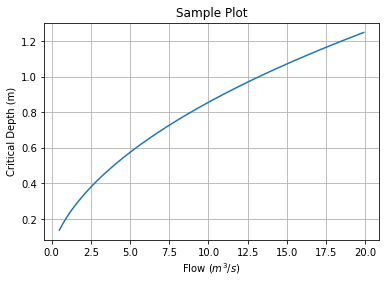

In [27]:
Qs=np.arange(0.5,20.0,0.1)
ycrits=[(root(sp_energy,1.0,args=(Q,g))).x[0] for Q in Qs]

plt.plot(Qs, ycrits)
plt.xlabel('Flow ($m^3/s$)')
plt.ylabel('Critical Depth (m)')
plt.title('Sample Plot')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

Making attractive, informative plots is an essential skill. Spend the time to explore how to add multiple lines, specify lines or point styles, add legends, and so on. A good starting point is https://matplotlib.org/gallery.html